In [1]:
import pandas as pd
import matplotlib.pyplot as plt




In [2]:
student_df = pd.DataFrame({'name': ['Alice', 'Bob', 'Carol', 'Dan', 'Eli', 'Fran'],
                           'gender': ['female', 'male','female', 'male', 'male', 'female'],
                           'class': ['FY', 'SO', 'SR', 'SO',' JR', 'SR'],
                           'gpa': [90, 93, 97, 89, 95, 92],'num_classes': [4, 3, 4, 4, 3, 2]})
student_df

,name,gender,class,gpa,num_classes
0,Alice,female,FY,90,4
1,Bob,male,SO,93,3
2,Carol,female,SR,97,4
3,Dan,male,SO,89,4
4,Eli,male,JR,95,3
5,Fran,female,SR,92,2


#### Create new attibute named 'female_flag' whose individual cells should hold the Boolean value True if the corresponding student is female, otherwise False

In [3]:
student_df['female_flag'] = student_df['gender'].apply(lambda x: x=='female')

In [4]:
student_df

,name,gender,class,gpa,num_classes,female_flag
0,Alice,female,FY,90,4,True
1,Bob,male,SO,93,3,False
2,Carol,female,SR,97,4,True
3,Dan,male,SO,89,4,False
4,Eli,male,JR,95,3,False
5,Fran,female,SR,92,2,True


In [5]:
student_df=student_df.drop('gender', axis=1)

In [6]:
student_df

,name,class,gpa,num_classes,female_flag
0,Alice,FY,90,4,True
1,Bob,SO,93,3,False
2,Carol,SR,97,4,True
3,Dan,SO,89,4,False
4,Eli,JR,95,3,False
5,Fran,SR,92,2,True


In [7]:
# apply hot encodding to class column by using get_dummies
student_df= pd.concat([student_df.drop('class', axis=1), pd.get_dummies(student_df['class'])], axis=1)
student_df

,name,gpa,num_classes,female_flag,JR,FY,SO,SR
0,Alice,90,4,True,0,1,0,0
1,Bob,93,3,False,0,0,1,0
2,Carol,97,4,True,0,0,0,1
3,Dan,89,4,False,0,0,1,0
4,Eli,95,3,False,1,0,0,0
5,Fran,92,2,True,0,0,0,1


In [8]:
gender_group = student_df.groupby('female_flag')
gender_group

In [9]:
gender_group['gpa'].mean()

female_flag
False    92.333333
True     93.000000
Name: gpa, dtype: float64

In [10]:
gender_group['num_classes'].sum()

female_flag
False    10
True     10
Name: num_classes, dtype: int64

## Scatterplot

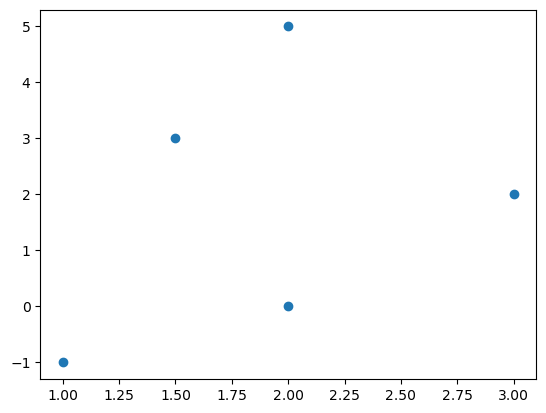

In [11]:
## Ploting a  list of points on plane
x = [1, 2, 3, 1.5, 2]
y = [-1, 5, 2, 3, 0]
sizes = [10, 40, 60, 80, 100]

plt.scatter(x, y)
plt.show()